<a href="https://colab.research.google.com/github/jcausey-astate/ASRI-2024/blob/main/python_beginner_choosing_a_model_complete_ASRI24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Choosing and Evaluating Machine Learning Models in Python (Beginner)

## ASRI 2024

![](https://jcausey-astate.github.io/ASRI-2024/images/choosing_and_evaluating_ml_models_in_python_title_card.svg)

This notebook shows some introductory examples from the "Choosing and Evaluating
Machine Learning Models in Python" workshop session.

The notebook uses the following modules:

* `matplotlib`  : Provides basic graphing/charting.
* `numpy`       : Allows matrix and vector/array math.
* `pandas`      : Provides DataFrame functionality.
* `seaborn`     : Works with `matplotlib` to provide nicer graphs.
* `sklearn`     : Scikit-Learn provides machine learning and data manipulation
  tools.

We will rely heavily on the Scikit-Learn library for models, metrics, and
experimental design tools.  See the full documentation for this fantastic
library at <https://scikit-learn.org>.

---

**In this workshop, we will focus on the big picture questions of model _selection_ and _evaluation_:**

* **Model Selection :** How to you begin to choose a model?
  * Prediction vs Exploration
  * Regression vs Classification
  * Supervised vs Unsupervised
  * General model types and assumptions
  * Some common and useful models to consider.
* **Evaluation Metrics :** How do you know when your model is doing a good job?

## Model Selection : How to you begin to choose a model?

### Prediction vs Exploration

**Prediction** means that you have some value, label, or other concept that you want to be able to predict in the future, given some measurements or information (we will call these "features" or "random variables" or "predictors") from a sample.  For example, you might want to predict whether a mushroom is edible based on observed facts about it such as gill type, spore print color, cap color, etc.

A predictive analysis implies that you _already know what you are looking for_ -- you have a value that is important to you (but might be hard to directly measure), and some predictive measurements that you believe might be able to determine that value.

**Exploration** means that you are more interested in using a dataset to discover interesting facts that might suggest something about how the world works.  For example, you might want to figure out whether you can identify separate groups of plants within a field that are growing differently in some way from other plants.

An exploratory analysis is an exercise in _curiosity_.  You are looking for interesting relationships or facts in a dataset that might be useful to you in some way.

### Regression vs Classification

**_Regression_** models try to compute a _continuous_ output value (dependent variable) for a given _sample_.

* **_Continuous_** values are numeric values that are allowed to take on any value within some range.
* A **_sample_** consists of all of the experimental information gathered for one
item in the dataset.  Sometimes a _sample_ is called an _observation_, _object_, or _item_.
Usually samples are arranged as _rows_ in tabular datasets (CSV files, Excel
spreadsheets, or similar).

**_Classification_** is the process of determining a _categorical label_ given
the _random variables_ for a given _sample_.

* **_Categorical_** values are allowed to take on only a finite (usually small)
set of values.  Categorical variables are usually non-numeric, but are sometimes
encoded as numbers.  Sometimes we refer to values of this type as _labels_,
_factors_, or _classes_.

A **_random variable_**, sometimes called an _input variable_, _measurement_, or
_feature_, is the recorded value for some property of the sample that was
measured in the experiment, e.g. "height", "age", "flower color", etc.

### Supervised vs Unsupervised

**_Supervised_** models require a training dataset that has the _correct_ output value (dependent variable) already determined.  The model is trained (or "fit") so that the correct output value is produced given the random variables in the sample for each sample in the training data.

* In Scikit-Learn: <https://scikit-learn.org/stable/supervised_learning.html>

**_Unsupervised_** models are able to produce an estimate for the dependent variable without the need to provide a pre-labeled training dataset.  Some unsupervised models focus on establishing similarities between groups of samples, rather than computing an output value.  (Clustering models do this, for example.)

* In Scikit-Learn: <https://scikit-learn.org/stable/unsupervised_learning.html>

### General model types and assumptions

* **Parametric models**
  * Parametric models are statistical models that make assumptions about the underlying distribution of the data being modeled.  In parametric models, the relationship between the input variables and the output variable is represented by a fixed equation with a predefined number of parameters.
* **Nonparametric models**
  * Nonparametric models are a type of statistical model that does not make any assumptions about the underlying distribution of the data being modeled. These models do not have a fixed number of parameters, and the complexity of the model increases as the amount of data increases. Nonparametric models are particularly useful when the underlying distribution of the data is unknown or when the data is very complex and nonlinear.

---

* **Linear models**
  * As the name implies, linear models imply a linear relationship between input features and the dependent variable:  $y=mx+b$.
  * Linear models require that all random variables are continuous, and that the following assumptions hold:
      1. Linearity: The relationship between $x$ and the mean of $y$ is linear.
      2. Homoscedasticity: The variance of residual is the same for any value of $x$.
      3. Independence: Observations are independent of each other.
      4. Normality: For any fixed value of $x$, $y$ is normally distributed.
  * Linear models can be extended to allow the dependent variable to follow a non-normal distribution through the use of a _link function_.  Models of this type are called _generalized linear models_ (GLMs); the **_Logistic Regression_** model is a common example.
* **Kernel-based models**
  * Kernel-based models transform the input variables into a potentially non-linear high-dimensional space before applying multi-linear modeling methods to solve for the dependent variable.  This allows the model to work on problems where simple linear models would not perform well.
  * A common example is the Support Vector Machine (SVM).
* **Tree-based models**
  * Tree-based models are based around the concept of a _decision tree_, which is a structure in which random variables are tested (a decision is made) and the next action to take depends on the result of that decision.  Drawing such a model on paper results in a tree-like structure where each _interior node_ is a decision and each _leaf node_ is a label or regression result.
* **Neural Network models**
  * Neural-network models rely on layers of artificial "neurons", each of which is a linear model followed by a nonlinear _activation function_.  Neural networks tend to contain large numbers of trainable parameters compared to other parametric models, and are capable of fitting very complex datasets with very complex outputs, but require intensive training to reach good performance.
  * Neural networks are often characterized by the number of layers (more than one hidden layer ➡️ "deep learning") and the way layers are connected ("fully connected", "convolutional", "recurrent", "transformer", etc.).
* **Clustering models**
  * Clustering models are used primarily for _exploratory analysis_.  They do not require a known labeling for the data, and work by establishing groupings within the samples based on some similarity measure.
  * Common examples are k-Means, Hierarchical Clustering, DBSCAN, Mean Shift.
* **Ensemble models**
  * Ensemble models models that use _collections_ of simpler models internally, then reach a final output label or regression result by _consensus_.  By utilizing many simple models, ensembles are often able to both reach higher peak performance and also lower variance than single models.
  * Common examples are Random Forests, Boosting models (AdaBoost), and Gradient Boosted Tree models (XGBoost, LightGBM).

## Evaluation Metrics :  How do you know when your model is doing a good job?

#### Let's see some code! First, we will import the python packages we need for this workshop:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.io import arff
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import PredictionErrorDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#### Now, we need to set up some datasets.  _You can run these cells and ignore the code there for now_ -- come back to it later after you've looked at the discussion of the different metrics below.

In [2]:
# The classification dataset is "Dry Bean" from https://archive.ics.uci.edu/dataset/602/dry+bean+dataset
# Download the dataset (but only if it hasn't already been done).
! [[ -f dry+bean+dataset.zip ]] || wget https://archive.ics.uci.edu/static/public/602/dry+bean+dataset.zip
! [[ -d DryBeanDataset ]] || unzip dry+bean+dataset.zip

# Load the data.
data = arff.loadarff("DryBeanDataset/Dry_Bean_Dataset.arff")
beans = pd.DataFrame(data[0])
beans["Class"] = beans["Class"].str.decode("utf-8")

# We will keep only three classes: "SIRA, CALI, and BOMBAY".
beans = beans[beans["Class"].isin(["SIRA", "CALI", "BOMBAY"])]
# Put the predictor column names in variables:
# We will choose only two variables for this tutorial (and not the
# best ones, by far - it is more interesting to view metrics
# when a model isn't too perfect).
beans_var_cols = ["Extent", "Eccentricity"]
# We will also create a binary version (one with only two classes).
bin_beans = beans.copy()
bin_beans.loc[bin_beans["Class"] != "SIRA", "Class"] = "NOT_SIRA"

# Make a simple 80% / 20% train/test split:
beans_train, beans_test = train_test_split(
    beans, test_size=0.20, stratify=beans["Class"], random_state=1
)
bin_beans_train, bin_beans_test = train_test_split(
    bin_beans, test_size=0.20, stratify=beans["Class"], random_state=1
)
# Place the ground truth labels in numpy arrays for ease of use later
beans_gt = beans_test['Class'].values
bin_beans_gt = bin_beans_test['Class'].values

# Print counts of each bean type:
print(
    f"Counts by class in train set (multiclass):\n{beans_train['Class'].value_counts()}"
)
print(
    f"\n\nCounts by class in test set (multiclass):\n{beans_test['Class'].value_counts()}"
)
print(
    f"\n\nCounts by class in train set (binary):\n{bin_beans_train['Class'].value_counts()}"
)
print(
    f"\n\nCounts by class in test set (binary):\n{bin_beans_test['Class'].value_counts()}"
)
# Create a simple linear (logistic) regression classifier...
lm = LogisticRegression(max_iter=1000)
# ... And train it on the multiclass problem...
lm.fit(beans_train[beans_var_cols], beans_train['Class'])
beans_preds = lm.predict(beans_test[beans_var_cols])
beans_probas = lm.predict_proba(beans_test[beans_var_cols])
mc_labels = lm.classes_
# ... And also on the binary classification problem.
lm.fit(bin_beans_train[beans_var_cols], bin_beans_train['Class'])
bin_beans_preds = lm.predict(bin_beans_test[beans_var_cols])
bin_beans_probas = lm.predict_proba(bin_beans_test[beans_var_cols])

Counts by class in train set (multiclass):
Class
SIRA      2109
CALI      1304
BOMBAY     417
Name: count, dtype: int64


Counts by class in test set (multiclass):
Class
SIRA      527
CALI      326
BOMBAY    105
Name: count, dtype: int64


Counts by class in train set (binary):
Class
SIRA        2109
NOT_SIRA    1721
Name: count, dtype: int64


Counts by class in test set (binary):
Class
SIRA        527
NOT_SIRA    431
Name: count, dtype: int64


In [3]:
# The regression dataset is "MPG" from https://archive.ics.uci.edu/dataset/9/auto+mpg
# Download the dataset (but only if it hasn't already been done).
! [[ -f auto+mpg.zip ]] || wget https://archive.ics.uci.edu/static/public/9/auto+mpg.zip
! [[ -f auto-mpg.data ]] || unzip auto+mpg.zip

# Load the data.
mpg = pd.read_csv(
    "auto-mpg.data",
    header=None,
    sep='\s+',
    usecols=[0, 2, 3, 4],
    names=["mpg", "disp", "hp", "weight"],
    na_values=["?"],
)
mpg = mpg.dropna(axis=0)
mpg_var_cols = ["disp", "hp", "weight"]
# We should really standardize the predictors, but for now, we'll ignore that.

# Make a simple 80/20 train/test split:
mpg_train, mpg_test = train_test_split(mpg, test_size=0.20, random_state=1)
mpg_gt = mpg_test['mpg'].values

rm = LinearRegression()
rm.fit(mpg_train[mpg_var_cols], mpg_train['mpg'])
mpg_preds = rm.predict(mpg_test[mpg_var_cols])

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/var/folders/lc/rg61fs4569dcvt21xd0nffx40000gn/T/ipykernel_69458/1930153589.py:10: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',


### Classification Metrics

A very good source of information about metrics for binary classifiers is available on Wikipedia:

<https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers>

#### Some definitions

* **Condition Positive (P)**
  * The number of real positive cases in the data
* **Condition Negative (N)**
  * The number of real negative cases in the data
* **True Positive (TP)**
  * A test result that correctly indicates the presence of a condition or characteristic
* **True Negative (TN)**
  * A test result that correctly indicates the absence of a condition or characteristic
* **False Positive (FP)**
  * A test result which wrongly indicates that a particular condition or attribute is present
* **False Negative (FN)**
  * A test result which wrongly indicates that a particular condition or attribute is absent

#### Metrics with examples

* **Recall    (REC)**
  * $\frac{\mathrm{TP}}{\mathrm{P}}$  or  $\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}$
  * In Scikit-Learn:  `sklearn.metrics.recall_score()`

In [4]:
print(
    f"REC (binary): {recall_score(bin_beans_gt, bin_beans_preds, pos_label='SIRA'):0.3f}"
)
print(
    f"REC (multiclass): {recall_score(beans_gt, beans_preds, average='weighted'):0.3f}"
)

REC (binary): 0.831
REC (multiclass): 0.735


* **Precision (PREC)**
  * $\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FP}}$

In [5]:
print(
    f"PREC (binary): {precision_score(bin_beans_gt, bin_beans_preds, pos_label='SIRA'):0.3f}"
)
print(
    f"PREC (multiclass): {precision_score(beans_gt, beans_preds, average='weighted'):0.3f}"
)

PREC (binary): 0.741
PREC (multiclass): 0.657


/Users/jcausey/A-State Dropbox/Jason Causey/ASRI/ASRI_2024/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


* **Accuracy  (ACC)**
  * $\frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{P}+\mathrm{N}}$ or $\frac{\mathrm{TP}+\mathrm{TN}}{\mathrm{TP}+\mathrm{TN}+\mathrm{FP}+\mathrm{FN}}$

In [6]:
print(f"ACC (binary): {accuracy_score(bin_beans_gt, bin_beans_preds):0.3f}")
print(f"ACC (multiclass): {accuracy_score(beans_gt, beans_preds):0.3f}")

ACC (binary): 0.747
ACC (multiclass): 0.735


* **Balanced Accuracy (BA)**
  * $\frac{1}{2}(\frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}} + \frac{\mathrm{TN}}{\mathrm{TN}+\mathrm{FP}})$
  * For multiclass, see <https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score>

In [7]:
print(f"BA (binary): {balanced_accuracy_score(bin_beans_gt, bin_beans_preds):0.3f}")
print(f"BA (multiclass): {balanced_accuracy_score(beans_gt, beans_preds):0.3f}")

BA (binary): 0.738
BA (multiclass): 0.535


* **F1 score  (F1)** is the harmonic mean of precision and recall.  Its is maximized when those metrics are well balanced (and high).
  * $\frac{2 \mathrm{TP}}{2 \mathrm{TP}+\mathrm{FP}+\mathrm{FN}}$

In [8]:
print(f"F1 (binary): {f1_score(bin_beans_gt, bin_beans_preds, pos_label='SIRA'):0.3f}")
print(f"F1 (multiclass): {f1_score(beans_gt, beans_preds, average='weighted'):0.3f}")

F1 (binary): 0.784
F1 (multiclass): 0.690


* **ROC curve** and **Area Under the ROC Curve (AUROC)**
  * <https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/><br>![<https://glassboxmedicine.com/2019/02/23/measuring-performance-auc-auroc/>](https://glassboxmedicine.files.wordpress.com/2019/02/roc-curve-v2.png)
  * Integrating the area under the ROC curve gives you the numeric metric _AUROC_.  It is in the range $[0,1]$, and higher is better.

AUROC (binary): 0.806
AUROC (multiclass): 0.786


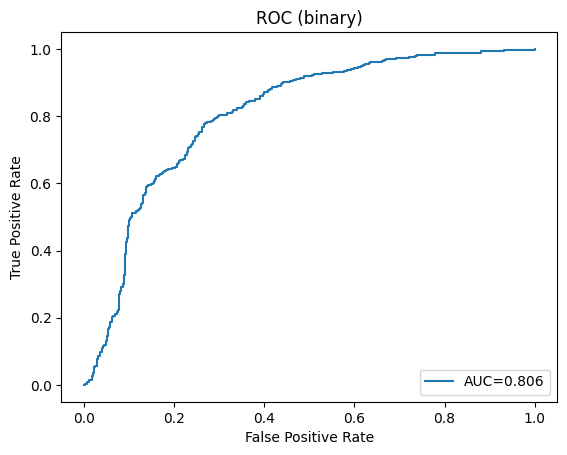

In [9]:
# Area under the ROC Curve:
auroc_bin = roc_auc_score(
    bin_beans_gt, bin_beans_probas[:, 1]
)  # 'SIRA' is in column index 1
auroc_mc = roc_auc_score(beans_gt, beans_probas, multi_class="ovr")

print(f"AUROC (binary): {auroc_bin:0.3f}")
print(f"AUROC (multiclass): {auroc_mc:0.3f}")


# A function to plot the ROC curve:
def plot_roc_curve(y_true, y_pred_proba, auc, desc=""):
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba, pos_label="SIRA")
    plt.plot(fpr, tpr, label=f"AUC={auc:0.3f}")
    plt.title(f"ROC {desc}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc=4)
    plt.show()


plot_roc_curve(bin_beans_gt, bin_beans_probas[:, 1], auroc_bin, "(binary)")

* **Confusion Matrix**
  * Visual grid showing the correct labeling (rows) versus the predicted labeling (columns), with the number in each cell representing the number of samples predicted for each (ground_truth / prediction) combination.
  * The major diagonal shows _correct_ labelings, all others show _incorrect_ labelings.
  * Most often used in multi-class evaluations.

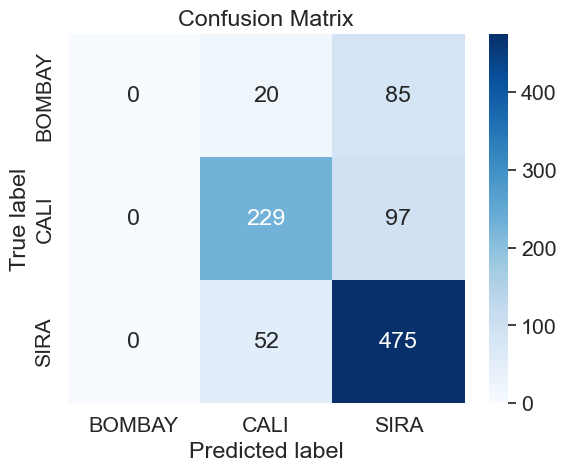

In [10]:
# Confusion matrix for the multiclass predictions:
cf_mat = confusion_matrix(beans_gt, beans_preds)

# plot the confusion matrix using seaborn heatmap
sns.set_theme(font_scale=1.4)  # adjust font size
sns.heatmap(
    cf_mat,
    annot=True,
    fmt="g",
    cmap="Blues",
    xticklabels=mc_labels,
    yticklabels=mc_labels,
)
# add axis labels and title
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
# show the plot
plt.show()

### Regression Metrics

See <https://en.wikipedia.org/wiki/Regression_validation> for a good discussion of regression validation metrics.  We will look at a few of the most common here, focusing mostly on what is available in Scikit-Learn (See <https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics>).

* **$R^2$ score, the coefficient of determination**
  * $R^2(y, \hat{y})=1-\frac{\sum_{i=1}^n\left(y_i-\hat{y}_i\right)^2}{\sum_{i=1}^n\left(y_i-\bar{y}\right)^2}$
  * It represents the proportion of variance (of y) that has been explained by the independent variables in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.
  * **It doesn't directly measure the performance of the model** as other metrics do.  You may want to use it in conjunction with another metric when measuring predictive performance.

In [11]:
print(f"R^2: {r2_score(mpg_gt, mpg_preds) :0.3f}")

R^2: 0.718


* **Mean Squared Error (MSE)**
  * $\operatorname{MSE}(y, \hat{y})=\frac{1}{n_{\text {samples }}} \sum_{i=0}^{n_{\text {samples }}-1}\left(y_i-\hat{y}_i\right)^2$
  * MSE is probably the most common regression metric.
  * While lower is better, MSE has no meaningful units and can be hard to interpret.

In [12]:
print(f"MSE: {mean_squared_error(mpg_gt, mpg_preds) :0.3f}")

MSE: 19.535


* **Mean Absolute Error (MAE)**
  * $\operatorname{MAE}(y, \hat{y})=\frac{1}{n_{\text {samples }}} \sum_{i=0}^{n_{\text {samples }}-1}\left|y_i-\hat{y}_i\right|$.
  * MAE has the advantage that it is in the same _units_ as the dependent variable, so it is easy to interpret.

In [13]:
print(f"MAE: {mean_absolute_error(mpg_gt, mpg_preds) :0.3f}")

MAE: 3.254


* **Mean Absolute Percentage Error (MAPE)**
  * $\operatorname{MAPE}(y, \hat{y})=\frac{1}{n_{\text {samples }}} \sum_{i=0}^{n_{\text {samples }}-1} \frac{\left|y_i-\hat{y}_i\right|}{\max \left(\epsilon,\left|y_i\right|\right)}$
  * A percentage is considered "more interpretable" in some circumstances.

In [14]:
mape_raw = mean_absolute_percentage_error(mpg_gt, mpg_preds)
print(f"MAPE {mape_raw * 100 :0.1f}% ({mape_raw:0.3f})")

MAPE 13.6% (0.136)


* **Visual evaluation of regression models**
  * Plotting the residuals is a good visual tool for understanding how well your model is behaving.
  * We can use the `PredictionErrorDisplay` object from Scikit-Learn to do this easily:

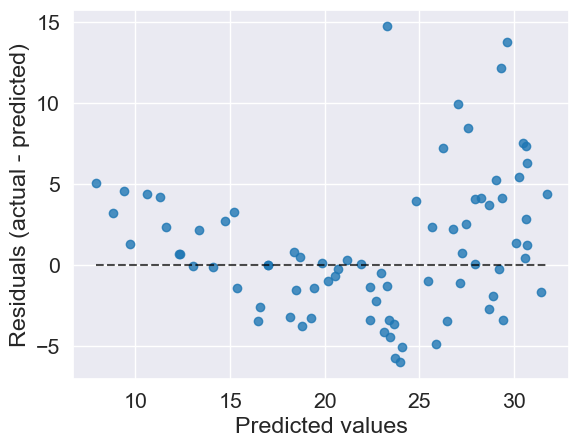

In [15]:
display = PredictionErrorDisplay(y_true=mpg_gt, y_pred=mpg_preds)
display.plot()

Ideally, you want to see the residuals randomly distributed around the 0 line.  If you see a _pattern_ in the residuals, that is an indication that your model isn't doing a very good job.  In our case, **these residuals do not look good** -- we may have non-linear behavior, but we are using a simple linear model to make predictions.

A model that fit its target better would have a residual plot more like the one shown below.

![](https://jcausey-astate.github.io/ASRI-2024/images/residual_plot_good.svg)

To solve this, we should probably consider transforming the predictors, the dependent variable, or both.  Or, we might want to choose a more complex model than a linear regression model.